<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/project_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 3 (core)
Lisa Broadhead <br/>
June 7, 2022

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.



# Part I

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "/content/drive/MyDrive/Colab Notebooks/coding_dojo/files/sales_predictions (1).csv"

In [ ]:
df = pd.read_csv(filename)
df.head(100)

# Part II

## 1. How many rows and columns?

In [4]:
df.shape

(8523, 12)

## 2. What are the datatypes of each variable?

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 3. Are there duplicates? If so, drop any duplicates.

In [7]:
# df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

## 4. Identify missing values.

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Outlet_size

It's too large to drop, so we replace all the nan with zeros

We used zeros because we just need a placeholder for the missing data and zero is a good enough choice as any

In [10]:
df['Outlet_Size'].isna().sum()

2410

In [11]:
df['Outlet_Size'].unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
# so too large to just delete or drop
2410/ 8523

0.2827642848762173

In [13]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(0)

In [14]:
df['Outlet_Size'].unique() 

array(['Medium', 0, 'High', 'Small'], dtype=object)

In [15]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_weight

replaced nan with the mean because I didn't want it to mess up any statics of the column. Putting a 0 would do that and putting a string would turn the whole column into an object

In [16]:
df['Item_Weight'].isna().sum()

1463

In [17]:
df.groupby(['Item_Weight']).mean()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,,,,
4.555,0.034362,111.729400,1996.750000,1761.706800
4.590,0.056632,112.546000,1997.800000,1267.683200
4.610,0.117167,173.825314,2002.285714,1993.595429
4.615,0.102001,232.455000,2000.000000,4078.025000
4.635,0.141144,127.199400,2001.800000,2184.489800
...,...,...,...,...
21.000,0.054926,193.931133,2000.666667,1194.778100
21.100,0.053389,143.143588,2000.882353,1851.472306
21.200,0.040697,174.579080,2002.000000,2763.735800


In [18]:
item_weigth_mean = df['Item_Weight'].notnull().mean()
item_weigth_mean

0.8283468262348939

In [19]:
df['Item_Weight'] = df['Item_Weight'].fillna(item_weigth_mean)

In [20]:
df['Item_Weight'].isna().sum()

0

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 6. Confirm that there are no missing values after addressing them.

In [22]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [23]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [24]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Weight
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65        0.82834683 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         

In [25]:
for val in df['Item_Outlet_Sales'].unique():
    print(val)

3735.138
443.4228
2097.27
732.38
994.7052
556.6088
343.5528
4022.7636
1076.5986
4710.535
1516.0266
2187.153
1589.2646
2145.2076
1977.426
1547.3192
1621.8888
718.3982
2303.668
2748.4224
3775.086
4064.0432
1587.2672
214.3876
4078.025
838.908
1065.28
308.9312
178.4344
125.8362
163.7868
2741.7644
3068.0064
2174.5028
2085.2856
3791.0652
2797.6916
1609.9044
388.1614
2180.495
3435.528
2150.534
2527.3768
6768.5228
373.5138
358.2004
2428.8384
5815.0972
2576.646
780.3176
3134.5864
850.8924
810.9444
3121.2704
4815.0656
6258.52
2117.244
796.9626
4910.275
892.172
3185.1872
1062.6168
484.7024
147.8076
2543.356
184.4266
4865.6664
1118.544
2302.3364
2027.361
599.22
4604.6728
2285.0256
5580.7356
2290.352
1207.0954
643.1628
1587.933
5305.0944
1697.79
1427.4752
4693.89
583.2408
3091.9752
2479.4392
2716.464
3285.723
661.8052
1523.3504
369.519
690.4346
1381.535
622.523
1274.3412
487.3656
1231.73
3755.112
4363.6532
1314.2892
1805.6496
2854.9504
3896.2616
667.7974
3185.853
2247.7408
1794.331
2530.7058
679.11

### Checking values

In [26]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [27]:
df.groupby(['Item_Identifier'])

In [28]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [29]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [30]:
df['Outlet_Identifier'].unique() 

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [32]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [33]:
df['Outlet_Establishment_Year'].unique() 

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

### Fixing column Item_Fat_Content

In [34]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [35]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat'})

In [36]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

## 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Item_weight
1. min
2. max
3. mean

In [38]:
df['Item_Weight'].min()

0.8283468262348939

In [39]:
df['Item_Weight'].max()

21.35

In [40]:
df['Item_Weight'].mean()

10.792777942835391

### Item_Visibility


In [41]:
df['Item_Visibility'].min()

0.0

In [42]:
df['Item_Visibility'].max()

0.328390948

In [43]:
df['Item_Visibility'].mean()

0.06613202877895127

### Item_MRP

In [44]:
df['Item_MRP'].min()

31.29

In [45]:
df['Item_MRP'].max()

266.8884

In [46]:
df['Item_MRP'].mean()

140.9927819781768

### Outlet_Establishment_Year

In [47]:
df['Outlet_Establishment_Year'].min()

1985

In [48]:
df['Outlet_Establishment_Year'].max()

2009

In [49]:
df['Outlet_Establishment_Year'].mean()

1997.8318667135984

### Item_Outlet_Sales

In [50]:
df['Item_Outlet_Sales'].min()

33.29

In [51]:
df['Item_Outlet_Sales'].max()

13086.9648

In [52]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

# Part III

In [53]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1. Histogram to view the distributions of various features in your dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadc1bbde50>,
      dtype=object)

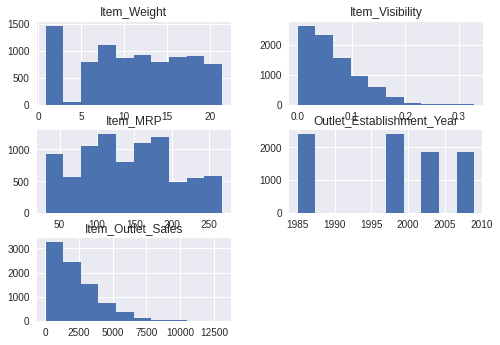

In [70]:
df.hist()

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

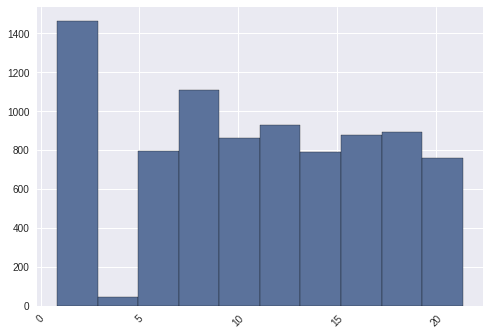

In [71]:
plt.style.use('seaborn')
df['Item_Weight'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- Looks like the item weight hovers around 5-20lbs
- with an outlier that is around 2-3

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text major ticklabel objects>)

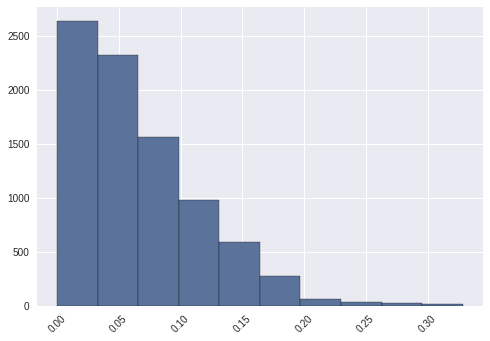

In [72]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- 75% Item visibility  > .15

### Interpretations
- Not really sure, beacuse I'm not sure what MRP is signifying. But there's no big outliers on either side
- And are lowest is around 200
- with highs around 100 & 175

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 8 Text major ticklabel objects>)

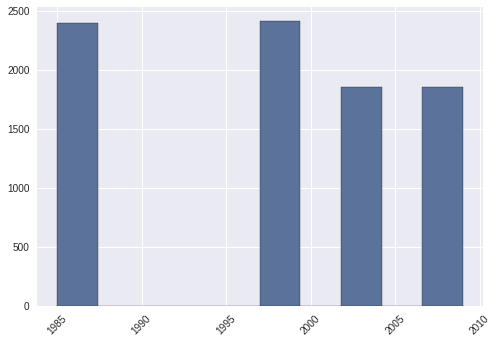

In [74]:
plt.style.use('seaborn')
iyears = df.loc[:,'Outlet_Establishment_Year']
df['Outlet_Establishment_Year'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- Looks like there's a spike in gordery stores every 10 years: 1986, then in 1998
- Was this data taken when the sore was annocuer or when they opened their doors to the public?
- Wonder what was going on between 1985-1998 to have nothing happen
- I wonder if these numbers signify the amount of totally new establisments, or just new stores in a new area. Like Smiths setting up a new store in the next town over opposed to Harriets which is totally new
- Also wonder why there's a spike in stores when sales drop


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

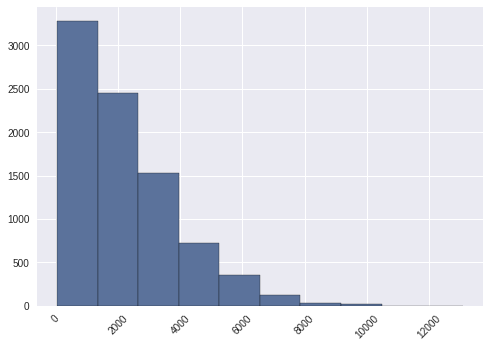

In [75]:
plt.style.use('seaborn')
isale = df.loc[:,'Item_Outlet_Sales']
df['Item_Outlet_Sales'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

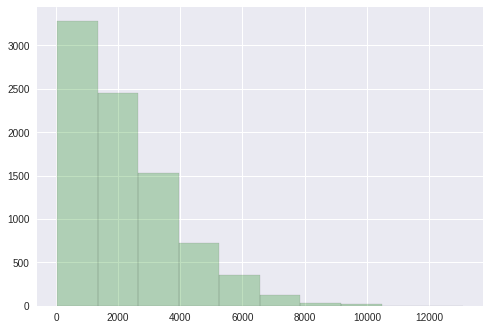

In [76]:
# fig, ax = plt.subplots()
df.loc[:,'Item_Outlet_Sales'].hist(bins=10,edgecolor='black', color= 'green', alpha = 0.25)
df.loc[:,'Outlet_Establishment_Year'].hist(facecolor='purple',alpha = 0.5)
# ax.set_title("Sales vs. Year")
# ax.set_xlabel('Sales and  Year')
# ax.set_ylabel('Count')
# plt.legend(["Sales","Year"])
plt.show()

In [77]:
df['Item_Outlet_Sales'].shape, df['Outlet_Establishment_Year'].shape

((8523,), (8523,))

### Resources
1. plot two histograms - https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/

## 2. Boxplot to view statistical summaries of various features in your dataset. 

In [64]:
# fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize=(10,10))
# mrp = df['Item_MRP']
# plt.boxplot([mrp], labels=['mrp'], notch=True,widths = .6);

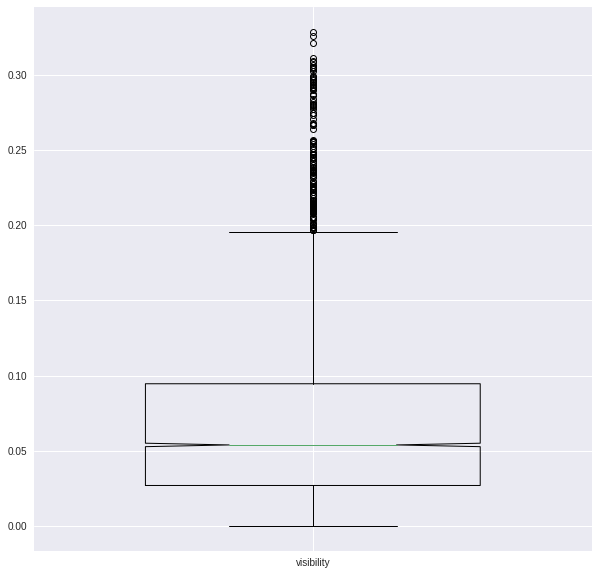

In [65]:
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize=(10,10))
visibility = df['Item_Visibility']
plt.boxplot([visibility], labels=[ 'visibility'], notch=True,widths = .6);

### Interpretations
- Not sure what Item visibilty is but is averages around .06
-There looks like a lot of outliers


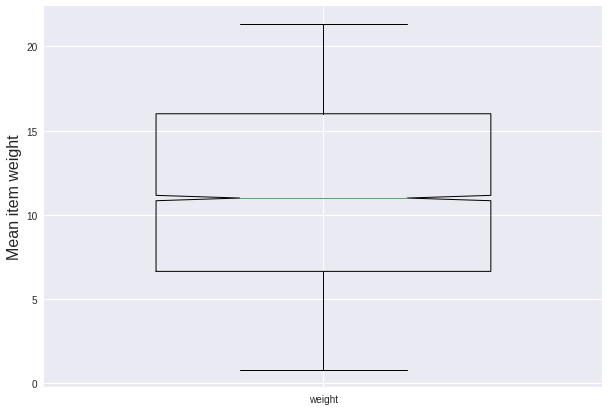

In [66]:
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize=(10,7))
weight = df['Item_Weight']
plt.boxplot([weight], labels=['weight'], notch=True,widths = .6);
plt.ylabel('Mean item weight', fontsize = 16);

### Interpretations
- Looks like the average weigth is around 11-12lbs

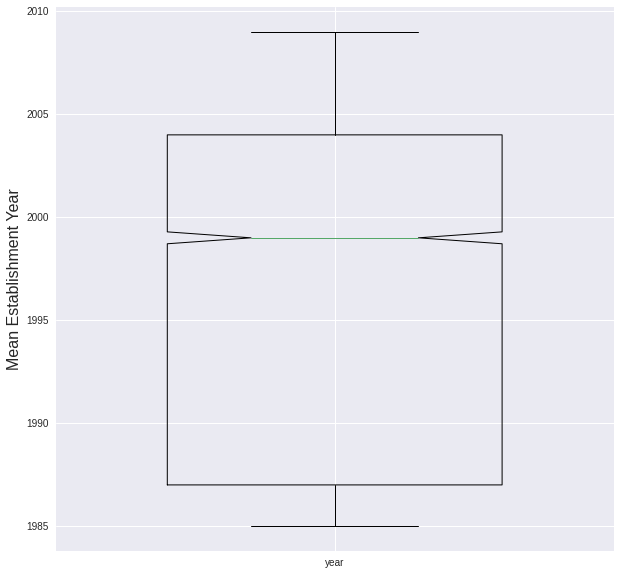

In [67]:
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize=(10,10))
year = df['Outlet_Establishment_Year']
plt.boxplot([year], labels=['year'], notch=True,widths = .6);
plt.ylabel('Mean Establishment Year', fontsize = 16);

### Interpretations
- looks like the average number of stores were built in 1998

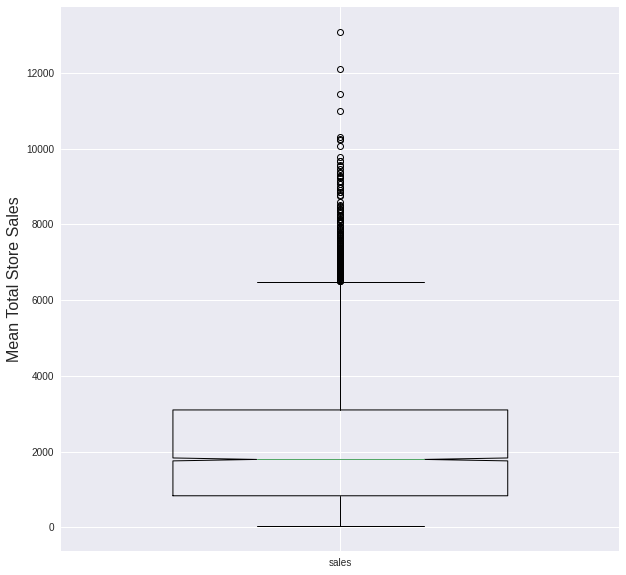

In [68]:
# since sales had a lot more laarge data I made it its own graph
plt.style.use('seaborn')
fig, axs = plt.subplots(nrows = 1, ncols = 1,figsize=(10,10))
sales = df['Item_Outlet_Sales']
plt.boxplot([sales], labels=['sales'], notch=True,widths = .6);
plt.ylabel('Mean Total Store Sales', fontsize = 16);

### Interpretations
- It looks like on average people spend about 2000 at the grocery staore a year

### Resources
1. Changing Boxplot size - https://stackoverflow.com/questions/32443803/adjust-width-of-box-in-boxplot-in-python-matplotlib
2. Changing the figuresize - https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
3. 

## 3. Heatmap of the correlation between features.

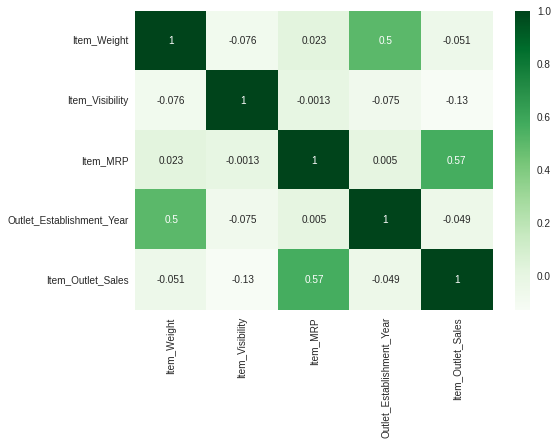

In [69]:
corr = df.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

### Interpretations 
- Medium correlation between 'Item MRP' and 'Item Outlet Sales
- Medium correlation between 'Item Weight' and 'Outlet Establisment Year'
- Other than then the correction numbers are not significatn enought to draw conculsinos


### Resources
1. 